Multiple Linear Regression uses several explanatory variables to predict the outcome of a response variable. 

Dataset link: https://github.com/bnsreenu/python_for_microscopists/tree/master/268-How%20to%20deploy%20your%20trained%20machine%20learning%20model%20into%20a%20local%20web%20application/files_for_training_model

#Heart disease: The effect that the independent variables biking and smoking have on the dependent variable heart disease.

Import Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

Import Data

In [8]:
df = pd.read_csv('heart_data.csv')
print(df.head())

   Unnamed: 0     biking    smoking  heart.disease
0           1  30.801246  10.896608      11.769423
1           2  65.129215   2.219563       2.854081
2           3   1.959665  17.588331      17.177803
3           4  44.800196   2.802559       6.816647
4           5  69.428454  15.974505       4.062224


Data preprocessing

In [9]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.rename(columns={"heart.disease":"heart_disease"}, inplace=True)


Exploratory Data Analysis

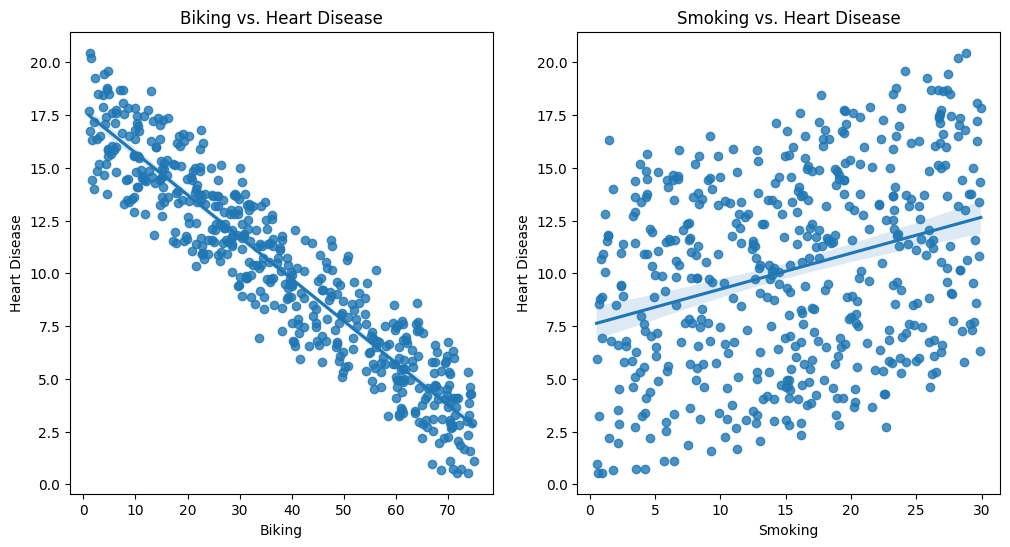

In [15]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# First subplot
sns.regplot(x='biking', y='heart_disease', data=df, ax=axes[0])
axes[0].set_xlabel('Biking')
axes[0].set_ylabel('Heart Disease')
axes[0].set_title('Biking vs. Heart Disease')

# Second subplot
sns.regplot(x='smoking', y='heart_disease', data=df, ax=axes[1])
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Heart Disease')
axes[1].set_title('Smoking vs. Heart Disease')

#plt.tight_layout()
plt.show()



In [16]:
# Create X DataFrame without the dependent variable
x_df = df.drop('heart_disease', axis=1)

# Create y DataFrame with only the dependent variable
y_df = df['heart_disease']

Test Train Split

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=53)

Instantiate Model

In [19]:
from sklearn import linear_model

# Create the regressor: reg_all
model = linear_model.LinearRegression()


Fit the regressor to the training data

In [20]:
model.fit(X_train, y_train) #IV and DV to be predicted
print(model.score(X_train, y_train)) # prints the R2 value

0.9794612210166284


Prediction test

In [23]:
y_pred = model.predict(X_test)


206     2.551151
146    10.106794
391     2.654706
331     8.549095
444    14.897961
         ...    
116    14.411483
418    17.133745
430     8.570583
58      5.306818
305    12.351390
Name: heart_disease, Length: 150, dtype: float64 [ 2.62650703  9.91447542  2.88542685  8.84313871 15.94545337  9.41093645
 16.36530408  7.18736232  2.2758865  16.35627521 12.49818284  5.55051674
  3.75969572 12.62209814 11.25900032  4.53733821 10.96505747  8.79734403
  7.38347575  7.3518438   6.22619908 10.47475197  4.54007141 11.2015159
 14.73206151  6.11684195  6.34632965  5.74382324 10.23558803  6.19514884
 18.31241075  7.9954029  11.27548766 16.2868478  18.61718837  8.10674064
 15.87873929 12.27072422  4.19569176  6.8134962   4.48824946  9.79653983
  8.09633518 13.76064347 12.1512407   8.20911684 11.53587522  5.71134814
  8.06873912  2.99895074 11.55853995 18.30677351  6.32138839 16.93567714
 10.31141115  8.94076907 13.22661733  8.46903668 14.230889   10.9093158
 17.24678449 18.78847346  3.1782973 

Results

In [27]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE and R2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R2: ", model.score(X_test, y_test)) # R2 value for test data


RMSE: 0.687679952353215
R2:  0.9795682831447132


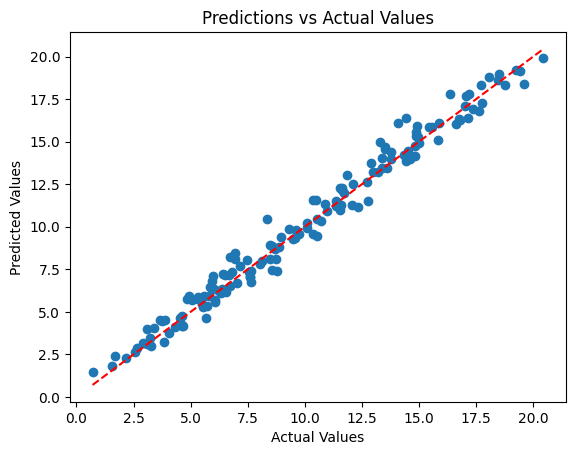

In [28]:

# Visualize predictions vs actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Actual Values")
plt.show()


In [29]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the table
print(results_df)

        Actual  Predicted
206   2.551151   2.626507
146  10.106794   9.914475
391   2.654706   2.885427
331   8.549095   8.843139
444  14.897961  15.945453
..         ...        ...
116  14.411483  13.869848
418  17.133745  16.381126
430   8.570583   7.434086
58    5.306818   5.846248
305  12.351390  11.142720

[150 rows x 2 columns]


Save the model

In [30]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

Sanity Check: Load and test the model

In [32]:
# Load the model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Pass in inputs
inputs = [[70.1, 26.3]]  # Define the inputs as a list of lists
X_new = pd.DataFrame(inputs, columns=['biking', 'smoking'])

# Predict using the new input data
y_pred = model.predict(X_new)

# Print the predicted values
print(y_pred)

[5.64082134]
